In [3]:
import keras
from keras.models import load_model

In [4]:
model = load_model("weights_20200429")

In [5]:
%cd /home/aditya/Documents/SolarCycleProject/code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import gaussian
import src.preprocesser as pre
import src.network as network
import src.plotter as plotter
from src.hyperparams import *
%load_ext autoreload

/home/aditya/Documents/SolarCycleProject/code


In [6]:
# Getting the data
headers = ["Year",
           "Month",
           "Day",
           "Decimal Date",
           "Daily Total Sunspot Number",
           "Sunspot Number Stddev",
           "No of observations",
           "Definitive/Provisional"
]
filename = "data/SN_d_tot_V2.0.csv"
data = pd.read_csv(filename, delimiter=";", names=headers)

In [7]:
# Data Preprocessing
x, y = pre.preprocess(data)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
ymax: 528.0 ymin: 0.0
x.shape: (73741,)
y.shape: (73741,)


In [8]:
X = y
x_slid, y_slid = pre.sliding_window_main(X, X)
x_train, y_train, x_val, y_val, x_test, y_test = pre.data_splitting_main(x_slid, y_slid)

x_slid.shape: (73739, 2, 1)
y_slid.shape: (73739, 1)
x_train.shape:  (44243, 2, 1)
y_train.shape:  (44243, 1)
x_val.shape:  (14748, 2, 1)
y_val.shape:  (14748, 1)
x_test.shape:  (14748, 2, 1)
y_test.shape:  (14748, 1)



In [9]:
net = load_model("weights_20200429")

In [10]:
var_train = np.var(y_train)
var_val = np.var(y_val)
print("Variance in y_train:", var_train)
print("Variance in y_val:", var_val)

Variance in y_train: 0.07560490709763526
Variance in y_val: 0.10671947525347535


pred1.shape: (73739, 1)
pred2.shape: (44243, 1)


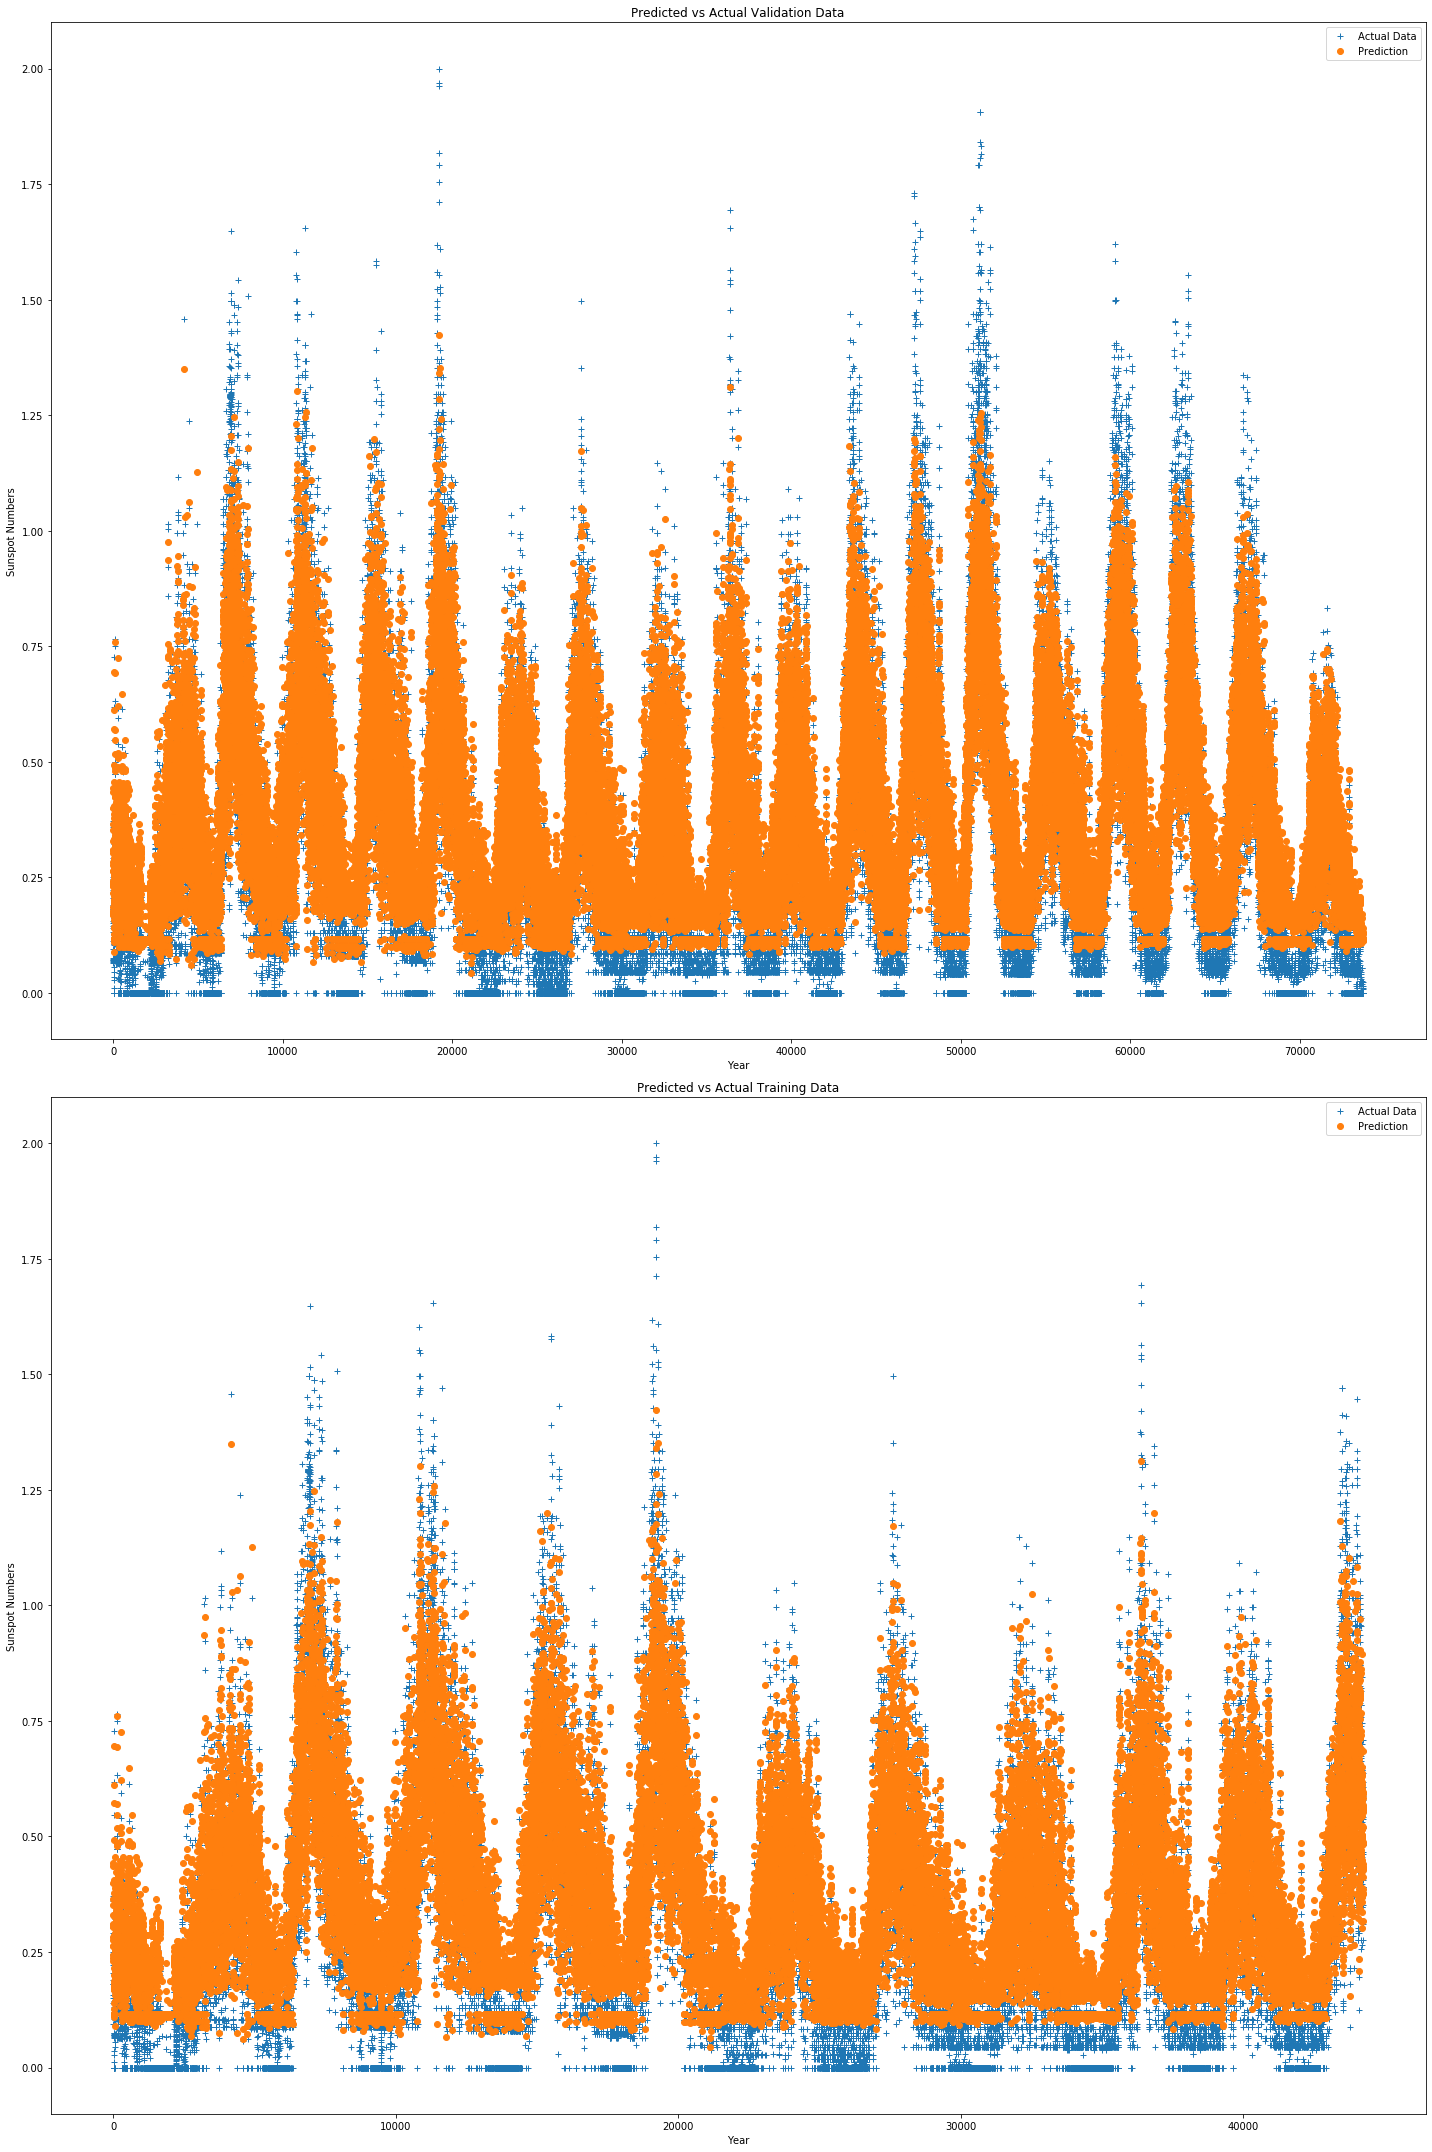

In [11]:
plotter.plot_predictions(net, x_train, y_train, x_slid, y_slid)